In [1]:
import tensorflow as tf
class PolynomialFeatures(tf.keras.layers.Layer):
    def __init__(self, power = 4):
        super(PolynomialFeatures, self).__init__()
        self.power = power
    
    def build(self, input_shape):
        self.indices_to_extract = tf.ones((input_shape[-1],input_shape[-1]))
        self.indices_to_extract = tf.linalg.band_part(self.indices_to_extract,-1,0) #Getting lower triangle part of self.indices to extract
        self.indices_to_extract = tf.reshape(self.indices_to_extract,(1,-1))[0] #Making matrix into row matrix
        self.indices_to_extract = tf.where(self.indices_to_extract==1) #Getting indices inside tensor which has value equal to one
        self.indices_to_extract = tf.reshape(self.indices_to_extract, (1,1,-1)) #Expanding the indices matrix to suit matrix extraction
    
    def call(self, inputs):
        if(len(inputs.shape)==2):
            inputs = tf.reshape(inputs, (tf.shape(inputs)[0],1,tf.shape(inputs)[1]))
        self.X = tf.matmul(inputs,inputs,transpose_a=True)
        self.gather_indices = tf.repeat(self.indices_to_extract, tf.shape(inputs)[0], axis = 0) #Repeating self.indices_to_extract same number of times as input shape
        self.X = tf.reshape(self.X,(tf.shape(inputs)[0], 1, -1)) #Flattening the multiplied matrices
        self.X = tf.gather(self.X,self.gather_indices, batch_dims=2) #Select only those entries of x whose indices are in self.gather_indices
        outputs = tf.concat([inputs, self.X], axis=2) #Now create new inputs matrix which has x1
        outputs = tf.reshape(outputs, (tf.shape(outputs)[0], tf.shape(outputs)[-1]))
        return outputs

**Demo 1**

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 polynomial_features (Polyno  (None, 2)                0         
 mialFeatures)                                                   
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 2s 4ms/step - loss: 283.5871
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 278.9228
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 274.2957
Epoch 4/1000
10/

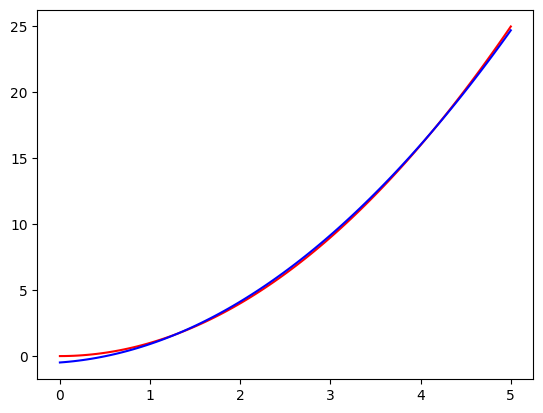

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,100)
y = x**2

inputs = tf.keras.layers.Input(shape=(1))
layer = PolynomialFeatures(power=3)(inputs)
outputs = tf.keras.layers.Dense(1)(layer)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss = 'mse')
model.summary()

es = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)
model.fit(x,y,batch_size=10,epochs=1000, callbacks=[es])

y_hat = model.predict(x)

model.summary()

a = plt.plot(x,y, color='red')
b = plt.plot(x,y_hat, color='blue')
plt.show()

**Demo 2**

In [3]:
#The Dataset
import numpy as np
x1 = np.linspace(0,10,2000)
x1 = np.reshape(x1,(-1,1))
x2 = np.linspace(10,20,2000)
x2 = np.reshape(x2,(-1,1))
x = np.concatenate((x1,x2), axis=1)
y = 2*x1+3*x2+5*x1*x2+x1**3+x2**2


#The model using the Polynomial Features Layer
inputs = tf.keras.layers.Input(shape=(2))
layer = PolynomialFeatures()(inputs)
dense = tf.keras.layers.Dense(5)(layer)
outputs = tf.keras.layers.Dense(1)(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss = 'mse')
model.summary()

#Training the Model
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

model.fit(x,y,batch_size=10,epochs=1000, callbacks=[es])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 polynomial_features_1 (Poly  (None, 5)                0         
 nomialFeatures)                                                 
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
200/200 [==============================] - 1s 2ms/step - loss: 1426189.1250
Epoch 2/1000
200/200 [==================